In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
import imageio
from os import listdir
from os.path import isfile, join
import scipy.misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

import numpy 
from sklearn import metrics
import time
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [21]:
os.chdir(r"C:\Users\Dazzyl\Master thesis\gender\UTKFace") 


In [23]:
onlyfiles = os.listdir()
len(onlyfiles)
shuffle(onlyfiles)
gender = [i.split('_')[1] for i in onlyfiles]

In [24]:
classes = []
for i in gender:
    i = int(i)
    classes.append(i)

In [25]:
X_data =[]
for file in onlyfiles:
    face = imageio.imread(file)
    face = cv2.resize(face, (32, 32) )
    X_data.append(face)

In [26]:
X = np.squeeze(X_data)


In [27]:
X.shape


(23708, 32, 32, 3)

In [28]:
# normalize data
X = X.astype('float32')
X /= 255

In [29]:
classes[:10]


[0, 1, 0, 0, 1, 0, 0, 1, 1, 0]

In [30]:
categorical_labels = to_categorical(classes, num_classes=2)


In [31]:
categorical_labels[:10]


array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [32]:
(x_train, y_train), (x_test, y_test) = (X[:15008],categorical_labels[:15008]) , (X[15008:] , categorical_labels[15008:])
(x_valid , y_valid) = (x_test[:7000], y_test[:7000])
(x_test, y_test) = (x_test[7000:], y_test[7000:])

In [33]:
len(x_train)+len(x_test) + len(x_valid) == len(X)


True

In [124]:
#algo do kroku i innych
(y1,x1,y2,y2,y3,x3,y4,x4,y5,x5)= ([],[],[],[],[],[],[],[],[],[])
def Colored_function_accuracy(k_f, leg_name):
    plt.rcParams["figure.figsize"] = (12,5)
    if k_f==1:
        y1 = history.history['accuracy']  
        x1 = history.history['val_accuracy']  
        plt.plot(y1,'r')
        plt.plot(x1,'r--')
    if k_f==2:
        y2 = history.history['accuracy']
        x2 = history.history['val_accuracy']  
        plt.plot(y2,'b')
        plt.plot(x2,'b--')
    if k_f==3:
        y3 = history.history['accuracy']
        x3 = history.history['val_accuracy']  
        plt.plot(y3,'g')
        plt.plot(x3,'g--')
    if (k_f==4 and leg_name=='Adam'):
        y4 = history.history['accuracy']
        x4 = history.history['val_accuracy']  
        plt.plot(y4,'c')
        plt.plot(x4,'c--')
    if (k_f==5 and leg_name=='Adam'):
        y5 = history.history['accuracy'] 
        x5 = history.history['val_accuracy'] 
        plt.plot(y5,'k')
        plt.plot(x5,'k--')
        plt.title('Model dokładności klasyfikacji')
        plt.ylabel('Dokładność')
        plt.xlabel('Ilość epok')
        plt.legend(['Ucz. Adam','Wal. Adam','Ucz. Adamax','Wal. Adamax',
                    'Ucz. Adagrad', 'Wal. Adagrad','Ucz. Adadelta',
                    'Wal. Adadelta','Ucz. SGD','Wal. SGD'], 
               loc='lower right', prop={'size': 9},ncol=5)  

    if (k_f==4 and leg_name=='BCE'):
        y4 = history.history['accuracy']
        x4 = history.history['val_accuracy']  
        plt.plot(y4,'c')
        plt.plot(x4,'c--')
        plt.title('Model dokładności klasyfikacji')
        plt.ylabel('Dokładność')
        plt.xlabel('Ilość epok')
        plt.legend(['Ucz. BCE','Wal. BCE','Ucz. HL','Wal. HL',
                    'Ucz. SHL', 'Wal. SHL','Ucz. MSE',
                    'Wal. MSE'], loc='lower right', prop={'size': 9},ncol=4)

    if (k_f==4 and leg_name=='lrate'):
        y4 = history.history['accuracy']
        x4 = history.history['val_accuracy']  
        plt.plot(y4,'c')
        plt.plot(x4,'c--')
        plt.title('Model dokładności klasyfikacji')
        plt.ylabel('Dokładność')
        plt.xlabel('Ilość epok')
        plt.legend(['Ucz. Krok=0,01','Wal. Krok=0,01','Ucz. Krok=0,001','Wal. Krok=0,001',
                 'Ucz. Krok=0,0001', 'Wal. Krok=0,0001','Ucz. Krok=0,00001', 
                'Wal. Krok=0,00001'],loc='lower right', prop={'size': 9},ncol=4)

      
    if (k_f==4 and leg_name=='Batch'):
        y4 = history.history['accuracy']
        x4 = history.history['val_accuracy']  
        plt.plot(y4,'c')
        plt.plot(x4,'c--')
        plt.title('Model dokładności klasyfikacji')
        plt.ylabel('Dokładność')
        plt.xlabel('Ilość epok')
        plt.legend(['Ucz. Ilość pakietów=64','Wal. Ilość pakietów=64','Ucz. Ilość pakietów=128','Wal. Ilość pakietów=128',
                        'Ucz. Ilość pakietów=196', 'Wal. Ilość pakietów=196','Ucz. Ilość pakietów=256',
                        'Wal. Ilość pakietów=256'], loc='lower right', prop={'size': 9},ncol=4)

        
    my_path = os.path.abspath(r"C:\Users\Dazzyl\Desktop\plots") 
    my_file = ('Acc_' + '_Bat_' + str(batch_i) + '_Epo_'  + str(epoch_i) + '_los_' + str(loss_type) 
                +'_Opt_' + str(optimizer_type) +  '.jpg')  
    plt.savefig(os.path.join(my_path, my_file)) 

def Colored_function_loss(k_f, leg_name):
      plt.rcParams["figure.figsize"] = (12,5)
      if k_f==1:
        y1 = history.history['loss']  
        x1 = history.history['val_loss']  
        plt.plot(y1,'r')
        plt.plot(x1,'r--')

      if k_f==2:
        y2 = history.history['loss']
        x2 = history.history['val_loss']  
        plt.plot(y2,'b')
        plt.plot(x2,'b--')
      if k_f==3:
        y3 = history.history['loss']
        x3 = history.history['val_loss']  
        plt.plot(y3,'g')
        plt.plot(x3,'g--')
        
      if (k_f==4 and leg_name=='Adam'):
        y4 = history.history['loss']
        x4 = history.history['val_loss']  
        plt.plot(y4,'c')
        plt.plot(x4,'c--')
        
      if (k_f==5 and leg_name=='Adam'):
        y5 = history.history['loss'] 
        x5 = history.history['val_loss'] 
        plt.plot(y5,'k')
        plt.plot(x5,'k--')
        plt.title('Model błędu klasyfikacji')
        plt.ylabel('Błąd')
        plt.xlabel('Ilość epok')
        plt.legend(['Ucz. Adam','Wal. Adam','Ucz. Adamax','Wal. Adamax',
                    'Ucz. Adagrad', 'Wal. Adagrad','Ucz. Adadelta',
                    'Wal. Adadelta','Ucz. SGD','Wal. SGD'], 
               loc='upper right', prop={'size': 9},ncol=5)  


      if (k_f==4 and leg_name=='BCE'):
        y4 = history.history['loss']
        x4 = history.history['val_loss']  
        plt.plot(y4,'c')
        plt.plot(x4,'c--')
        plt.title('Model błędu klasyfikacji')
        plt.ylabel('Błąd')
        plt.xlabel('Ilość epok')
        plt.legend(['Ucz. BCE','Wal. BCE','Ucz. HL','Wal. HL',
                    'Ucz. SHL', 'Wal. SHL','Ucz. MSE',
                    'Wal. MSE'], loc='upper right', prop={'size': 9},ncol=4)
             
      if (k_f==4 and leg_name=='lrate'):
        y4 = history.history['loss']
        x4 = history.history['val_loss']  
        plt.plot(y4,'c')
        plt.plot(x4,'c--')
        plt.title('Model błędu klasyfikacji')
        plt.ylabel('Błąd')
        plt.xlabel('Ilość epok')
        plt.legend(['Ucz. Krok=0,01','Wal. Krok=0,01','Ucz. Krok=0,001','Wal. Krok=0,001',
                 'Ucz. Krok=0,0001', 'Wal. Krok=0,0001','Ucz. Krok=0,00001', 
                'Wal. Krok=0,00001'],loc='upper right', prop={'size': 9},ncol=4)

      if (k_f==4 and leg_name=='Batch'):
        y4 = history.history['loss']
        x4 = history.history['val_loss']  
        plt.plot(y4,'c')
        plt.plot(x4,'c--')
        plt.title('Model błędu klasyfikacji')
        plt.ylabel('Błąd')
        plt.xlabel('Ilość epok')
        plt.legend(['Ucz. Ilość pakietów=64','Wal. Ilość pakietów=64','Ucz. Ilość pakietów=128','Wal. Ilość pakietów=128',
                        'Ucz. Ilość pakietów=196', 'Wal. Ilość pakietów=196','Ucz. Ilość pakietów=256',
                        'Wal. Ilość pakietów=256'], loc='upper right', prop={'size': 9},ncol=4)
    

      my_path = os.path.abspath(r"C:\Users\Dazzyl\Desktop\plots") 
      my_file = ('loss_'+ '_Bat_' + str(batch_i) + '_Epo_'  + str(epoch_i) + '_los_' +str(loss_type)  + '_Opt_' + 
      str(optimizer_type) + '.jpg')    
      plt.savefig(os.path.join(my_path, my_file))  


In [36]:
model = tf.keras.Sequential()

    # Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Activation('relu'))
#




#
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Take a look at the model summary
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 32)         

In [37]:
#learning_rate_type = 0.001
#optimizer_type = tf.keras.optimizers.Adam(lr=learning_rate_type, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

loss_type = 'binary_crossentropy'
model.compile(loss=loss_type, optimizer='adam', metrics=['accuracy'])

#loss_type = 'hinge'
#model.compile(loss=loss_type, optimizer='adam', metrics=['accuracy'])

#loss_type = 'squared_hinge'
#model.compile(loss=loss_type, optimizer='adam', metrics=['accuracy'])

#loss_type = 'mean_squared_error'
#model.compile(loss=loss_type, optimizer='adam', metrics=['accuracy'])

#fname = "model_weight_initial.h5"
#model.save_weights(fname,overwrite=True)


In [182]:
model.load_weights('model_weight_initial.h5')    


aug_checkpoint = tf.keras.callbacks.ModelCheckpoint('aug_Best_model.h5',
                                 monitor = 'val_loss',
                                 verbose=0,
                                 save_best_only=True,
                                 mode='auto')

#print(model.get_weights())

[array([[[[-3.57883759e-02,  1.65898688e-02,  1.48529902e-01,
          -3.22260968e-02,  1.77340601e-02,  2.35993698e-01,
           1.34276137e-01,  1.75960466e-01, -5.21445982e-02,
          -1.56509187e-02, -2.41438508e-01,  2.27246955e-01,
          -1.08410604e-01, -1.99825421e-01,  5.74111417e-02,
          -3.38785909e-02,  1.54303864e-01, -1.65231049e-01,
          -1.51556447e-01,  1.09743588e-01,  1.07227363e-01,
           1.19527377e-01, -9.29581895e-02,  4.89837788e-02,
          -2.19489485e-01,  1.97251141e-01, -1.88118100e-01,
          -1.43781319e-01,  3.34202237e-02, -2.03293666e-01,
           7.59686977e-02, -2.56402522e-01,  1.79341570e-01,
          -2.15395510e-01, -8.55939388e-02, -2.90491998e-01,
          -1.56493351e-01,  2.21514672e-01, -2.81035095e-01,
          -3.18175964e-02, -1.43250480e-01, -2.16211602e-01,
          -4.80469167e-02,  1.67560995e-01, -5.54309450e-02,
           2.54088730e-01,  1.84329271e-01, -2.50917047e-01,
          -2.83055156e-

Train on 15008 samples, validate on 7000 samples
Epoch 1/2
15008/15008 [==============================] - 2s 133us/sample - loss: 0.5826 - accuracy: 0.6924 - val_loss: 0.4692 - val_accuracy: 0.8052
Epoch 2/2
15008/15008 [==============================] - 2s 100us/sample - loss: 0.4489 - accuracy: 0.7937 - val_loss: 0.4021 - val_accuracy: 0.8247
Train on 15008 samples, validate on 7000 samples
Epoch 1/2
15008/15008 [==============================] - 2s 115us/sample - loss: 0.6118 - accuracy: 0.6654 - val_loss: 0.5335 - val_accuracy: 0.7411
Epoch 2/2
15008/15008 [==============================] - 1s 63us/sample - loss: 0.4883 - accuracy: 0.7659 - val_loss: 0.4642 - val_accuracy: 0.7906
Train on 15008 samples, validate on 7000 samples
Epoch 1/2
15008/15008 [==============================] - 1s 85us/sample - loss: 0.6245 - accuracy: 0.6543 - val_loss: 0.5913 - val_accuracy: 0.7110
Epoch 2/2
15008/15008 [==============================] - 1s 52us/sample - loss: 0.5248 - accuracy: 0.7438 - va

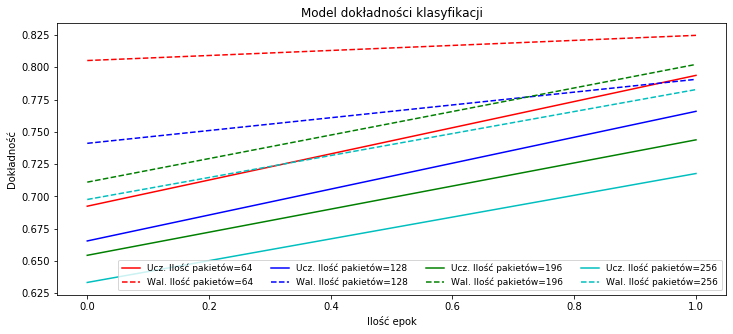

In [125]:
#step plots
batch_i= 64
epoch_i =95
loss_type = 'binary_crossentropy'
optimizer_type = 'adam'
learning_rate_type = 0.001
k=1
n=0
reset_n=0
plot_type = 'Batch'
score_array =[]
while k<=4:
    optimizer_type2 = tf.keras.optimizers.Adam(lr=learning_rate_type, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    model.compile(loss=loss_type, optimizer=optimizer_type, metrics=['accuracy'])

    batch_size=batch_i
    epochs=epoch_i
    model.load_weights('model.h5')
    history  = model.fit(x_train,
         y_train,
         batch_size,
         epochs,
         validation_data=(x_valid, y_valid),)
        # callbacks = [aug_checkpoint],
       #  verbose = 1,
        # shuffle=True)
        
    if k==1: 
        Colored_function_accuracy(k, plot_type)
       # Colored_function_loss(k, plot_type)  
       # optimizer_type='Adamax'
        #loss_type = 'hinge'

    if k==2:
        Colored_function_accuracy(k, plot_type)
       # Colored_function_loss(k, plot_type)  
       # optimizer_type='Adagrad'
        #loss_type = 'squared_hinge'

    if k==3:
        Colored_function_accuracy(k, plot_type)
     #   Colored_function_loss(k, plot_type)  
       # optimizer_type='Adadelta'
        #loss_type = 'mean_squared_error'

    if k==4:
        Colored_function_accuracy(k, plot_type)
    #    Colored_function_loss(k, plot_type)  
    #    optimizer_type='SGD'
    
    if k==5:
        Colored_function_accuracy(k, plot_type)
    batch_i+= 64  
    k+=1  
    


In [741]:
y1= history.history['accuracy']
y11 = history.history['val_accuracy']
x1 = history.history['loss']  
x11 = history.history['val_loss'] 

In [744]:
y2 = history.history['accuracy']
y22 = history.history['val_accuracy']
x2 = history.history['loss']  
x22 = history.history['val_loss']  

In [747]:
y3 = history.history['accuracy']
y33 = history.history['val_accuracy']
x3 = history.history['loss'] 
x33 = history.history['val_loss']

In [750]:
y4 = history.history['accuracy']
y44 = history.history['val_accuracy']
x4 = history.history['loss'] 
x44 = history.history['val_loss'] 

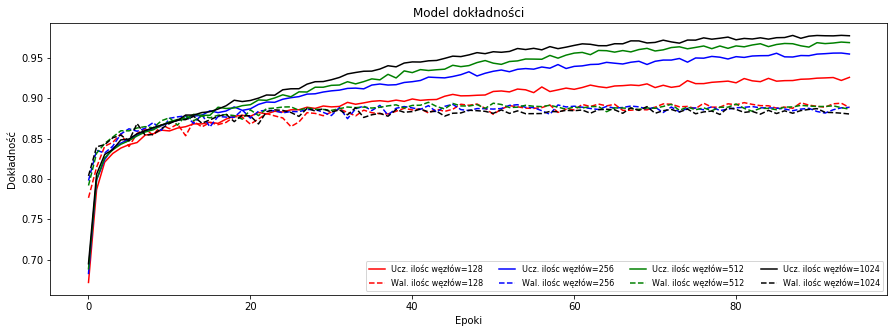

In [758]:
plt.plot(y1,'r')
plt.plot(y11,'r--')
plt.plot(y2,'b')
plt.plot(y22,'b--')
plt.plot(y3,'g')
plt.plot(y33,'g--')
plt.plot(y4,'k')
plt.plot(y44,'k--')
plt.title('Model dokładności')
plt.ylabel('Dokładność')
plt.xlabel('Epoki')
plt.legend(['Ucz. ilośc węzłów=128','Wal. ilośc węzłów=128','Ucz. ilośc węzłów=256','Wal. ilośc węzłów=256',
            'Ucz. ilośc węzłów=512', 'Wal. ilośc węzłów=512','Ucz. ilośc węzłów=1024',
            'Wal. ilośc węzłów=1024'], loc='lower right', prop={'size': 8},ncol=4)
my_path = os.path.abspath(r"C:\Users\Dazzyl\Desktop\plots") 
my_file = 'Accuracy_plot' + '_Batch_' + str(batch_i) + '_Epoch_'  + str(epoch_i) + str(loss_type) + '.jpg'
plt.savefig(os.path.join(my_path, my_file)) 

In [118]:
#epoch  changing
k=1
batch_i= 64
epoch_i =95
score_array =[]
batch_array=[]
start = time.time()

while k<=1:
    model.load_weights('model.h5')
    batch_size=batch_i
    epochs=epoch_i
    history  = model.fit(x_train,
         y_train,
         batch_size,
         epochs,
         validation_data=(x_valid, y_valid),
         callbacks = [aug_checkpoint],
         verbose = 1,
         shuffle=True,)
                         
    score = model.evaluate(x_test, y_test, verbose=0)    
    print('\n', 'Test accuracy:', score[1], "Batch size: ",batch_i,"Number of test : ",k )  
    score_array.append([score[1]*100])
    batch_array.append(k)
    k += 1

print("Total time: ", time.time() - start, "seconds")
print('\n')

predTest = model.predict(x_valid)
predTest = (predTest > 0.5)
print(metrics.classification_report(y_valid, predTest,digits=2))  

x = numpy.std(score_array)
print('STd:',x)
print('Var:', np.var(score))

print('Mulitple accuracy recived: ',score_array)

#plt.xlabel('Batch size')
#plt.ylabel('Test Accuracy')
#plt.plot(batch_array,score_array,'bo')


NameError: name 'aug_checkpoint' is not defined

In [231]:
#model.load_weights('aug_Best_model.h5')
score = model.evaluate(x_test, y_test, verbose=0)    
print(score[1])
json_string = model.to_json()
json_string


0.89323527


'{"class_name": "Sequential", "config": {"name": "sequential_22", "layers": [{"class_name": "Conv2D", "config": {"name": "conv2d_43", "trainable": true, "batch_input_shape": [null, 32, 32, 3], "dtype": "float32", "filters": 64, "kernel_size": [2, 2], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_43", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2, 2], "data_format": "channels_last"}}, {"class_name": "Dropout", "config": {"name": "dropout_63", "trainable": true, "dtype": "float32", "rate": 0.3, "noise_shape": null,

In [232]:
#single test
from keras.preprocessing import image
test_image = image.load_img(r'C:\Users\Dazzyl\Master thesis\gender\female1.jpg', target_size = (32,32))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0 )
result = model.predict(test_image)
if result [0][0] == True:
      print('male')
else:
      print('female')

female


Accuracy recived:  [[89.11764621734619]]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


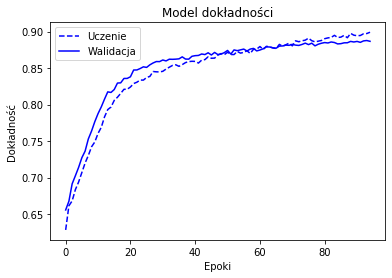

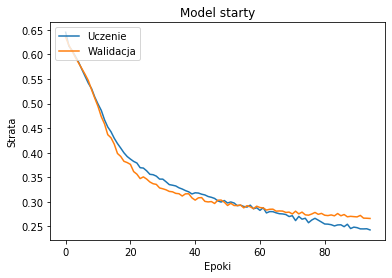

In [242]:
print('Accuracy recived: ',score_array, history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model dokładności')
plt.ylabel('Dokładność')
plt.xlabel('Epoki')
plt.legend(['Uczenie', 'Walidacja'], loc='upper left')

my_path = os.path.abspath(r"C:\Users\Dazzyl\Desktop\plots") 
my_file = 'Accuracy_plot' + '_Batch_' + str(batch_i) + '_Epoch_'  + str(epoch_i) + str(loss_type) + '.jpg'
plt.savefig(os.path.join(my_path, my_file)) 

plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model starty')
plt.ylabel('Strata')
plt.xlabel('Epoki')
plt.legend(['Uczenie', 'Walidacja'], loc='upper left')

my_path = os.path.abspath(r"C:\Users\Dazzyl\Desktop\plots") 
my_file = 'Loss_plot' + '_Batch_' + str(batch_i) + '_Epoch_'  + str(epoch_i) + str(loss_type) +'.jpg'
plt.savefig(os.path.join(my_path, my_file)) 

plt.show()

# "ROC-AOC"

In [ ]:

predict_x=model.predict(x_test)      
y_show=np.argmax(predict_x ,axis=1)
pd.set_option('display.max_rows', 1699)
pd.set_option('display.max_columns', 30000)
pd.set_option('display.width', 100)
df = pd.DataFrame(predict_x)
print(df)
print('\n', 'ARGMAAAAAAX')

df2 = pd.DataFrame(y_show)
print(df2)

In [162]:
print(score_array)
print(model.get_weights())

[[84.94117856025696], [51.235294342041016], [84.58823561668396], [86.05882525444031]]
[array([[[[-2.26820745e-02, -2.04228126e-02,  1.28818750e-01,
           6.65372610e-02, -7.47591630e-02,  2.39275530e-01,
           9.21027213e-02,  1.70999289e-01, -1.00214697e-01,
          -3.94671634e-02, -1.47349894e-01,  2.37967759e-01,
          -1.17808044e-01, -7.65784085e-02,  8.37145895e-02,
           1.73107758e-02,  1.14924178e-01, -1.36306226e-01,
          -9.03498754e-02,  6.26077130e-02,  1.51306257e-01,
           8.59068409e-02, -3.35720479e-02,  8.65941867e-02,
          -2.22048461e-01,  1.67396292e-01, -1.87610433e-01,
          -1.00734480e-01, -1.27813816e-01, -1.81465134e-01,
           1.33244079e-02, -2.04214081e-01,  8.87554586e-02,
          -2.36490905e-01, -1.57070294e-01, -3.08871955e-01,
          -2.06455648e-01,  2.63366073e-01, -3.27290267e-01,
          -2.19645519e-02, -1.04117453e-01, -7.02195168e-02,
          -3.81349921e-02,  8.94634128e-02,  1.42519534e-01

In [624]:
predTest = model.predict(x_test)
predTest = (predTest > 0.5)
print(metrics.classification_report(y_test, predTest,digits=2)) 
print(model.evaluate(x_test, y_test, verbose=0)    )


              precision    recall  f1-score   support

           0       0.93      0.85      0.89       871
           1       0.85      0.93      0.89       829

   micro avg       0.89      0.89      0.89      1700
   macro avg       0.89      0.89      0.89      1700
weighted avg       0.89      0.89      0.89      1700
 samples avg       0.89      0.89      0.89      1700

[0.28268654458663045, 0.8888235]


In [91]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8897059


In [94]:
labels =["Mężczyzna",  # index 0
        "Kobieta",      # index 1
        ]

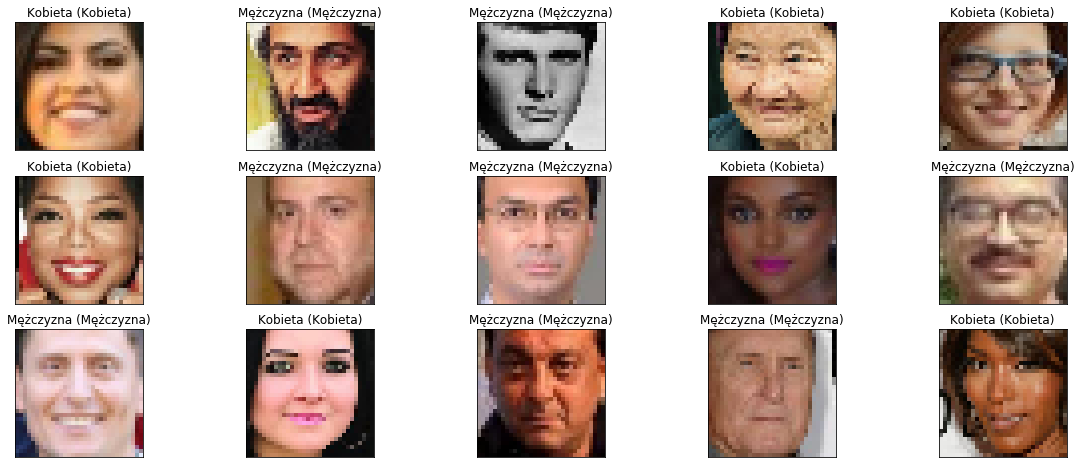

In [96]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("black" if predict_index == true_index else "red"))
plt.show()